<a href="https://colab.research.google.com/github/Cordero27/Minor-Machine-Learning/blob/main/Proyecto%20Final%20ML/%20Entrega%2002%20-%20Scrub/%20Entrega_05_Interpret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Reconocimiento de Actividad Humana (HAR)


In [127]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score

###Entrega 01 - OBTAIN

Incluir todo el código de la Etapa 01 - OBTAIN creada en la semana anterior

In [128]:
#Librerias a utilizar
import pandas as pd

#Fuente del dataset: https://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz
#Afortunadamente también podemos usar la función de extración de datos para archivos .csv
#Como este archivo no posee cabeceras, las incorporamos a la hora de leerlo con el parámetro names.
#Además, como el archivo con los datos posee filas de datos incompletas, recurrimos a ignorarlas para evitar alterar las estadisticas del conjunto con datos externos.
data = pd.read_csv('https://raw.githubusercontent.com/Cordero27/Minor-Machine-Learning/main/WISDM_ar_v1.1_raw.txt', on_bad_lines='skip',
                   names=["user","activity","timestamp","x-acceleration","y-accel","z-accel"])

#Observamos el contenido adquirido del archivo .txt
data.head()

,user,activity,timestamp,x-acceleration,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


###Entrega 02 - SCRUB

Eliminar filas con datos faltantes

*Uno de los pasos iniciales en la limpieza de datos consiste en eliminar aquellas filas que contengan datos faltantes. Estas líneas generalmente no aportan información y pueden complicar la etapa de entrenamiento y validación de muchos modelos predictivos.*


In [129]:
#Verificamos si existen NAs dentro del conjunto de datos.
data.info()

#Como en la columna z-accel tiene un valor null, debemos equilibrar el resto de columnas.
dataWONA = data.dropna()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098204 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user            1098204 non-null  int64  
 1   activity        1098204 non-null  object 
 2   timestamp       1098204 non-null  int64  
 3   x-acceleration  1098204 non-null  float64
 4   y-accel         1098204 non-null  float64
 5   z-accel         1098203 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 50.3+ MB


Agregar al DataFrame los nombres de las columnas 

*En ocasiones al crear los data frames el sistema asigna nombres genéricos y correlativos a las columnas. Es recomendable renombrar las columnas por nombres significativos para favorecer el análisis posterior de los datos.*

In [130]:
#Este paso fue ejecutado anteriormente. Especificamente al cargar el archivo con el dataset.

Visualizar las 5 primeras filas del DataFrame (.head())

*Siempre es buena medida visualizar algunas líneas del dataframe para tener una idea concreta del contenido.*


In [131]:
dataWONA.head()

,user,activity,timestamp,x-acceleration,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


Buscar datos nulos y eliminarlos si es que existen

In [132]:
#Este paso fue ejecutado al inicio de la etapa 2
#Pero limpiaremos las filas que tengan un mal formato de los datos

#Notamos que en la columna z-accel el caracter ';' esta presente al final de cada numero, por lo cual debemos quitarlo
dataWONA['z-accel'] = dataWONA['z-accel'].str.rstrip(';')
dataWONA.head()


<ipython-input-132-483c05663238>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWONA['z-accel'] = dataWONA['z-accel'].str.rstrip(';')


,user,activity,timestamp,x-acceleration,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [133]:
#Como desde un inicio, la columna z-accel tenia el caracter ';', el sistema consideró la fila con tipo object, por lo tanto debemos pasarla a tipo float
#dataWONA['z-accel'] = dataWONA['z-accel'].astype(str).astype(float)
#NOS ENCONTRAMOS CON UN ERROR!!, pero nos permite conocer que la fila z-accel aun no está limpia
#(ESTA COMENTADA LA LINEA DE CÓDIGO PARA EVITAR QUE LA EJECUCIÓN AUTOMÁTICA DE CELDAS SE CANCELE PRODUCTO DE ESTE ERROR)

In [134]:
#Con el error anterior, sabemos que existen ';' entre los numeros de la columna, entonces reemplazamos el ";"" por "".
import re
dataWONA['z-accel']=dataWONA['z-accel'].str.replace(";","")

<ipython-input-134-9f8710d80932>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWONA['z-accel']=dataWONA['z-accel'].str.replace(";","")


Visualizar los tipo de datos a los que pertenece cada columna (.info())

*Es necesario tener un detalle de cuantas variables están considerando y el tipo de datos que pertenecen para verificar si es posible utilizarla directamente para el modelo predictivo o si es necesario realizar una transformación del tipo de dato.*


In [135]:
dataWONA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user            1098203 non-null  int64  
 1   activity        1098203 non-null  object 
 2   timestamp       1098203 non-null  int64  
 3   x-acceleration  1098203 non-null  float64
 4   y-accel         1098203 non-null  float64
 5   z-accel         1098203 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 58.7+ MB


Cambiar el tipo de datos de las variables predictoras a valores reales, para realizar la clasificación 

*Muchas de las variables contenidas en el DataFrame originalmente se encuentran en el tipo de dato 'object'. En ese formato las variables no pueden ser interpretadas como vectores. Recordemos que la mayoría de los modelos de Machine Learning estudiados operan en el espacio vectorial. Por esta razón las variables que formarán parte del modelo predictivo deben ser transformadas a un formato numérico como 'Float' o 'integer'.*

Para este proyecto en particular se pide transformar  al tipo de dato Float, las variables del acelerómetro en el eje $x$, $y$ y $z$



In [136]:
#Finalmente, ya podemos cambiar el tipado de la columna, y aprovechamos de pasar la otra columna tipo object (activity) por category
dataWONA['z-accel'] = dataWONA['z-accel'].astype(str).astype(float)
dataWONA.loc[:, ("activity")] = pd.Categorical(dataWONA.loc[:, ("activity")])
dataWONA.loc[:, ("activity")] = dataWONA.activity.cat.codes
#dataWONA.activity.cat.categories

<ipython-input-136-4c94e6e2b1f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWONA['z-accel'] = dataWONA['z-accel'].astype(str).astype(float)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Imprimir los tipos de datos de las variables del DataFrame

*Se recomienda volver a ejecutar el comando info para verificar que efectivamente las variables cambiaron su tipo de dato y que ahora se pueden procesar con los modelos predictivos.*


In [137]:
dataWONA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user            1098203 non-null  int64  
 1   activity        1098203 non-null  int8   
 2   timestamp       1098203 non-null  int64  
 3   x-acceleration  1098203 non-null  float64
 4   y-accel         1098203 non-null  float64
 5   z-accel         1098203 non-null  float64
dtypes: float64(3), int64(2), int8(1)
memory usage: 51.3 MB


Eliminar las columnas que no se utilizaran para la clasificación

*En este caso deberíamos conservar la actividad respectiva y las variables asociadas al acelerómetro*


In [138]:
#Eliminamos la columna user y time, ya que no es relevante en este caso de estudio.
dataWONA = dataWONA.drop(dataWONA.columns[[0]], axis=1)
dataWONA = dataWONA.drop(dataWONA.columns[[1]], axis=1)

Utilizar el comando *value_counts* para obtener un detalle de cuantas instancias se tienen por actividad. El objetivo consiste en identificar la presencia del balance o desbalance en las categorías a modelar


In [139]:
dataWONA.value_counts()

activity  x-acceleration  y-accel  z-accel  
1         -0.00           0.00     -0.000000    11842
5         -0.00           0.00     -0.000000      491
4         -0.00           0.00     -0.000000      271
0         -0.00           0.00     -0.000000      233
2          5.48           2.56      8.240000      153
                                                ...  
1          6.28           1.99     -3.214402        1
                                    1.184970        1
                          2.11     -3.677494        1
                          2.18     -6.550000        1
5          19.91          19.23    -4.290000        1
Length: 979745, dtype: int64

Este proyecto considera datos con un desbalance de clases. Es necesario balancearlos para que los modelos operen de manera adecuada. Existen muchas maneras de realizar un balance, pero en este proyecto utilizaremos una estrategia sencilla e intuitiva. Simplemente debe identificar la actividad que contenga el número menor de instancias. Se debe realizar un muestreo para las otras actividades utilizando ese valor. De esta manera todas las clases tendrán la misma cantidad de instancias. 



In [140]:
#Obtenemos una muestra aleatoria de tamaño igual a la cantidad de menor de instancias
sampleData = dataWONA.sample(n = 3555)
sampleData

,activity,x-acceleration,y-accel,z-accel
125548,1,9.51,15.70,-0.503953
836667,5,1.08,6.59,-0.420000
733149,1,-0.76,5.18,6.470000
1049831,3,-8.28,5.86,-0.690000
921162,5,3.38,9.70,-3.980000
...,...,...,...,...
903780,4,0.57,6.74,-2.110000
410698,1,9.19,5.28,5.940000
616822,5,0.38,8.16,1.730000
1090501,4,-6.70,4.86,1.380000


Establecer el número de instancias y dimensiones del data frame resultante *(shape)*


In [141]:
sampleData.shape

(3555, 4)

Volver a imprimir la cantidad de instancias por categoría para verificar que todo esté en orden. *(value_counts)*

In [142]:
sampleData.value_counts()

activity  x-acceleration  y-accel  z-accel   
1          0.00            0.00     0.000000     35
2          6.47            2.53     6.470000      3
5          0.00            0.00     0.000000      3
           0.50            4.94    -1.457377      2
1         -0.53            10.50    0.612916      2
                                                 ..
           8.05            8.05    -6.630000      1
           8.08           -1.99     3.830000      1
           8.20            1.31    -8.430995      1
                           17.67    2.560625      1
5          19.57           19.57   -12.680000     1
Length: 3510, dtype: int64

Volver a visualizar las cinco primeras líneas del DataFrame para revisar que todo esté en orden *(head)*


In [143]:
sampleData.head()

,activity,x-acceleration,y-accel,z-accel
125548,1,9.51,15.70,-0.503953
836667,5,1.08,6.59,-0.420000
733149,1,-0.76,5.18,6.470000
1049831,3,-8.28,5.86,-0.690000
921162,5,3.38,9.70,-3.980000


Separar las variables predictoras (X) de las ctegorias o etiquetas (y)

In [144]:
from sklearn.model_selection import train_test_split
#Una vez normalizado podemos dividir el dataset en 2.
#Primero, dividimos del dataset en columnas independientes y dependientes ("operadoras" y "resultado").
X = sampleData.iloc[:, 1:4]
y = sampleData.iloc[:, 0]

Estandarizar los datos numericos (*StandardScaler)*

*Para el caso de la estandarización de los datos se pueden usar distintas técnicas, como la normalización 01, estandarización entre -1 y 1 o el denominado Z-Score. En este caso usaremos la función Standard Scaler de Python con sus valores por defecto.*


In [145]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X = ss.fit_transform(X)

Como último paso debe reconstruir el dataframe pegando las columnas de los variables predicadores (X) y las categorías (y)


In [146]:
df = pd.DataFrame(X)
df["activity"] = y.tolist()
df.columns =['x', 'y', 'z', 'activity']
df

,x,y,z,activity
0,1.292864,1.259857,-0.192860,1
1,0.056273,-0.077881,-0.174884,5
2,-0.213635,-0.284930,1.300390,1
3,-1.316739,-0.185076,-0.232696,3
4,0.393659,0.378800,-0.937144,5
...,...,...,...,...
3550,-0.018538,-0.055855,-0.536743,4
3551,1.245924,-0.270245,1.186907,1
3552,-0.046409,0.152662,0.285470,5
3553,-1.084970,-0.331919,0.210529,4


### Entrega 03 - EXPLORE

In [147]:
#Obtenemos las estadisticas correspondientes a cada columna
df.describe()

,x,y,z,activity
count,3.555000e+03,3.555000e+03,3.555000e+03,3555.000000
mean,-1.998714e-18,7.595112e-17,2.998071e-18,2.945429
std,1.000141e+00,1.000141e+00,1.000141e+00,1.929936
min,-2.978730e+00,-3.925164e+00,-4.103951e+00,0.000000
25%,-5.070140e-01,-5.962365e-01,-5.442376e-01,1.000000
50%,-6.254529e-02,1.086093e-01,-8.495431e-02,3.000000
75%,5.828878e-01,6.299015e-01,5.038704e-01,5.000000
max,2.824301e+00,1.897156e+00,3.876230e+00,5.000000


Graficamos en un histograma la cantidad de instancias por actividad en el dataset. 
Veremos que la gran mayoria pertenecen a actividades como Walking y Jogging.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


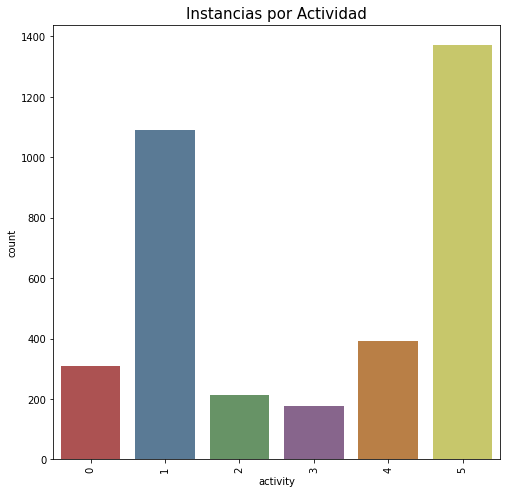

In [148]:
plt.title('Instancias por Actividad', fontsize=15)
sns.countplot(df.activity)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

Para ver cómo se comportan los datos en cada eje (x, y, z) los graficamos en un histograma, de manera de evidenciar que tan sesgados son los datos despues de su normalización.
Curiosamente veremos que en la columna Y existen algunos valores sesgados, pero que gracias a la normalización efectuada no son tan distantes del centro de la "campana".

(array([  81.,   78.,  159.,  400., 1030.,  846.,  517.,  261.,   92.,
          91.]),
 array([-2.97872954, -2.39842648, -1.81812342, -1.23782035, -0.65751729,
        -0.07721423,  0.50308884,  1.0833919 ,  1.66369496,  2.24399803,
         2.82430109]),
 <a list of 10 Patch objects>)

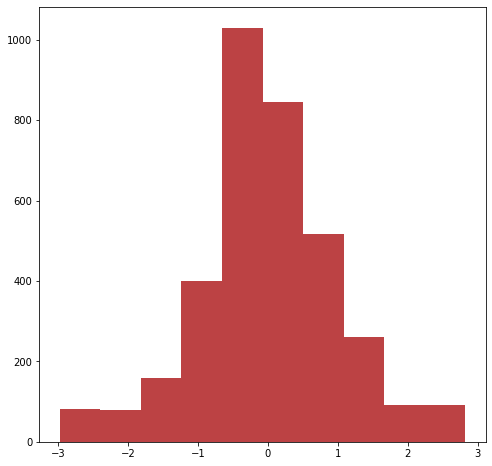

In [149]:
#Graficamos la columna X
plt.hist(df.x)

(array([ 26.,  25.,  43., 107., 324., 585., 717., 946., 456., 326.]),
 array([-3.9251645 , -3.34293249, -2.76070049, -2.17846848, -1.59623648,
        -1.01400447, -0.43177247,  0.15045954,  0.73269154,  1.31492354,
         1.89715555]),
 <a list of 10 Patch objects>)

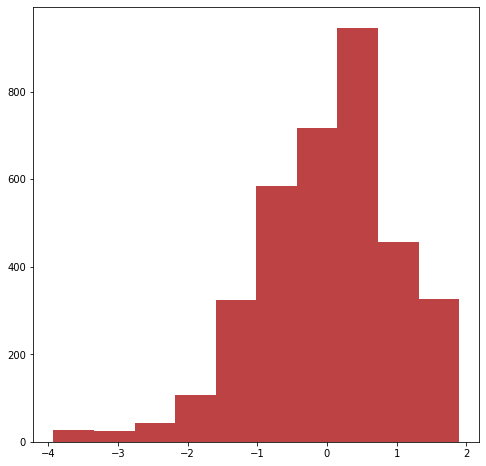

In [150]:
#Graficamos la columna Y
plt.hist(df.y)

(array([  10.,   36.,  100.,  303., 1266., 1132.,  379.,  271.,   44.,
          14.]),
 array([-4.10395087, -3.30593275, -2.50791462, -1.7098965 , -0.91187838,
        -0.11386025,  0.68415787,  1.482176  ,  2.28019412,  3.07821224,
         3.87623037]),
 <a list of 10 Patch objects>)

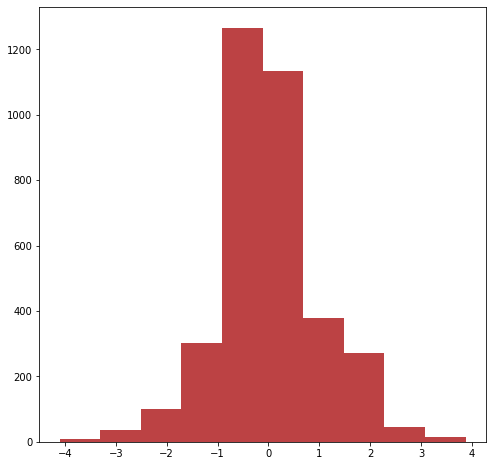

In [151]:
#Graficamos la columna Z
plt.hist(df.z)

Como la columna Y tiene un comportamiento levemente diferente a X y Z procedemos a graficarla en un nuevo histograma, pero solo ilustrando la curva que generan las barras, además, de añadir separar cada barra por actividad. Observamos que la actividad que destaca es Standing, debido a su alta concentración en el valor 0 del eje, reflejando que sus valores varian muy poco entre sí. También, se observa que la actividad Sitting posee una concentración de datos "anticipada", comparada a las otras actividades.


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

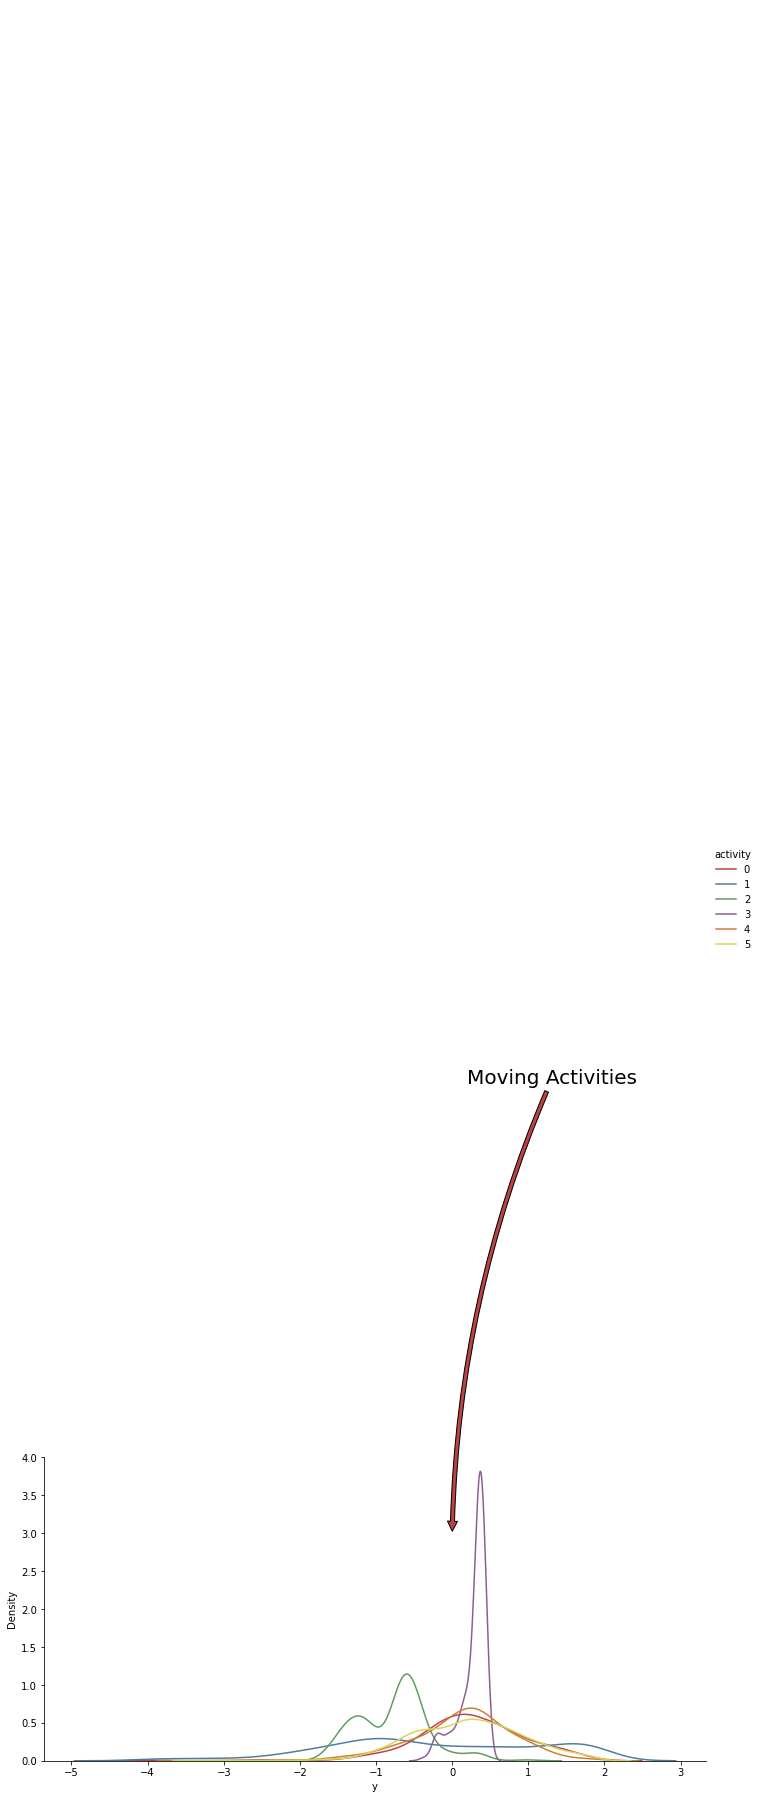

In [152]:
sns.set_palette("Set1", desat=0.60)
facetgrid = sns.FacetGrid(df, hue='activity', size=5,aspect=2)
facetgrid.map(sns.distplot,'y', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

Por contexto sabemos que existen actividades que involucran movimiento y otras que no. Veremos que sucede si las clasificamos usando este contexto.

In [153]:
df1 = df[df['activity']==1]
df2 = df[df['activity']==3]
df3 = df[df['activity']==5]
df4 = df[df['activity']==0]
df5 = df[df['activity']==2]
df6 = df[df['activity']==4]
#['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

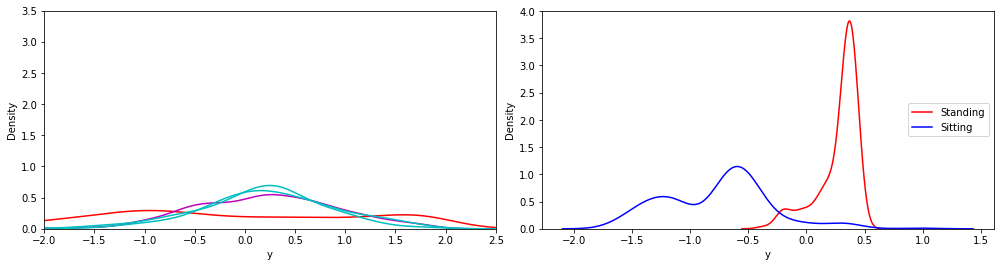

In [154]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.distplot(df1['y'],color = 'r',hist = False, label = 'Jogging')
sns.distplot(df3['y'],color = 'm',hist = False,label = 'Walking')
sns.distplot(df4['y'],color = 'c',hist = False, label = 'Downstairs')
sns.distplot(df6['y'],color = 'c',hist = False, label = 'Upstairs')
plt.axis([-2, 2.5, 0, 3.5])

plt.subplot(2,2,2)
sns.distplot(df2['y'],color = 'red',hist = False, label = 'Standing')
sns.distplot(df5['y'],color = 'blue',hist = False,label = 'Sitting')
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

De las gráficas anteriores se desprende que las actividades que involucran movimiento tienen un comportamiento suave con respecto a las actividades estaticas, las cuales son todo lo contrario. Para diferenciar una actividad de otra dentro de un patrón podemos hacer un zoom en el gráfico de las actividades en movimiento entre los valores -0.25 y 0.6. Y para el gráfico de las estaticas un rango de [-1, 0.5].
Por otro lado, notamos que los valores que alcanzan las actividades estaticas son mucho mayores que las de movimiento. Esto último nos proporciona un dato interesante.

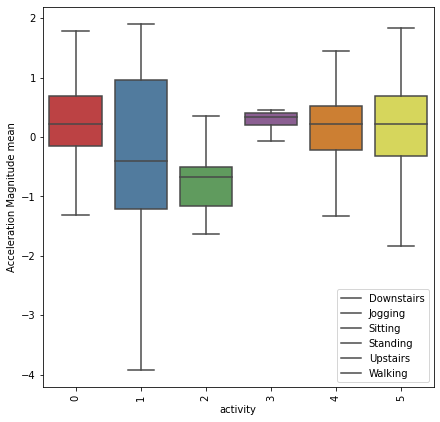

In [192]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activity', y='y',data=df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.legend(labels=['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking'])
plt.show()

En el diagrama de caja y bigote anterior se observa que las actividades estaticas (que no involucran desplazamiento) poseen la mediana muy cercana al quartil 3, además, de que las cajas son las más pequeñas (menor distancia entre Q1 y Q3), junto a la cantidad de valores sesgados.

Aplicar t-sne en los datos, donde la columna estudiada seguirá siendo Y.

En la siguientes gráficas se utiliza t-SNE, con perplexity: 2, 5, 10, 20, 50 respectivamente, y el número máximo de iteraciones (1000).

In [156]:


# realiza t-sne con diferentes valores de perplejidad y sus respectivas tramas..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # realizar t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity, n_jobs=-1).fit_transform(X_data)
        print('Done..')
        
        # preparar los datos para seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # dibujar la trama en el lugar apropiado en la cuadrícula
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')




performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 3555 samples in 0.003s...
[t-SNE] Computed neighbors for 3555 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3555
[t-SNE] Computed conditional probabilities for sample 2000 / 3555
[t-SNE] Computed conditional probabilities for sample 3000 / 3555
[t-SNE] Computed conditional probabilities for sample 3555 / 3555
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.028s


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 50: error = 113.8390732, gradient norm = 0.1204963 (50 iterations in 1.568s)
[t-SNE] Iteration 100: error = 95.7889404, gradient norm = 0.0665360 (50 iterations in 1.050s)
[t-SNE] Iteration 150: error = 89.6166077, gradient norm = 0.0551657 (50 iterations in 0.949s)
[t-SNE] Iteration 200: error = 85.8418732, gradient norm = 0.0591703 (50 iterations in 0.910s)
[t-SNE] Iteration 250: error = 83.0711746, gradient norm = 0.0452387 (50 iterations in 0.928s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.071175
[t-SNE] Iteration 300: error = 2.8298132, gradient norm = 0.0034784 (50 iterations in 0.950s)
[t-SNE] Iteration 350: error = 2.1675935, gradient norm = 0.0013465 (50 iterations in 0.954s)
[t-SNE] Iteration 400: error = 1.8265051, gradient norm = 0.0009628 (50 iterations in 0.988s)
[t-SNE] Iteration 450: error = 1.6153899, gradient norm = 0.0007585 (50 iterations in 0.993s)
[t-SNE] Iteration 500: error = 1.4672997, gradient norm = 0.0006174 (50

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


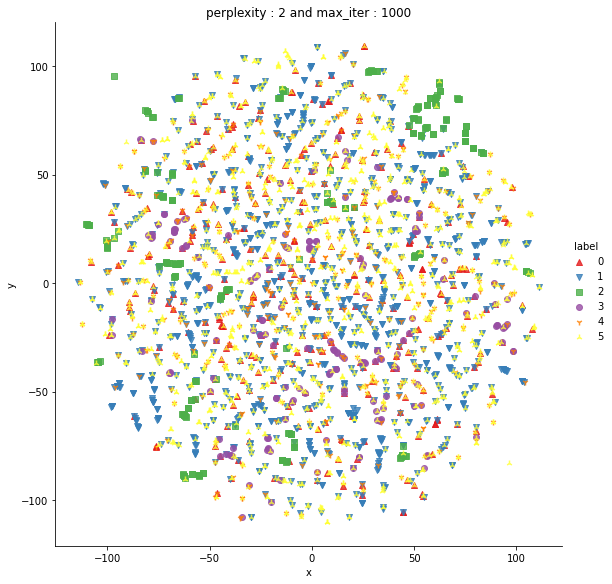

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 3555 samples in 0.003s...
[t-SNE] Computed neighbors for 3555 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3555
[t-SNE] Computed conditional probabilities for sample 2000 / 3555
[t-SNE] Computed conditional probabilities for sample 3000 / 3555
[t-SNE] Computed conditional probabilities for sample 3555 / 3555
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.047s


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 50: error = 101.1901321, gradient norm = 0.0850466 (50 iterations in 1.430s)
[t-SNE] Iteration 100: error = 85.6749725, gradient norm = 0.0393663 (50 iterations in 1.003s)
[t-SNE] Iteration 150: error = 80.4304504, gradient norm = 0.0280758 (50 iterations in 0.942s)
[t-SNE] Iteration 200: error = 77.1157379, gradient norm = 0.0258929 (50 iterations in 0.936s)
[t-SNE] Iteration 250: error = 74.7766571, gradient norm = 0.0228471 (50 iterations in 0.951s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.776657
[t-SNE] Iteration 300: error = 2.2060723, gradient norm = 0.0014795 (50 iterations in 0.965s)
[t-SNE] Iteration 350: error = 1.5268486, gradient norm = 0.0007876 (50 iterations in 1.007s)
[t-SNE] Iteration 400: error = 1.2572293, gradient norm = 0.0005569 (50 iterations in 0.981s)
[t-SNE] Iteration 450: error = 1.1038607, gradient norm = 0.0004227 (50 iterations in 0.950s)
[t-SNE] Iteration 500: error = 1.0036107, gradient norm = 0.0003366 (50

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


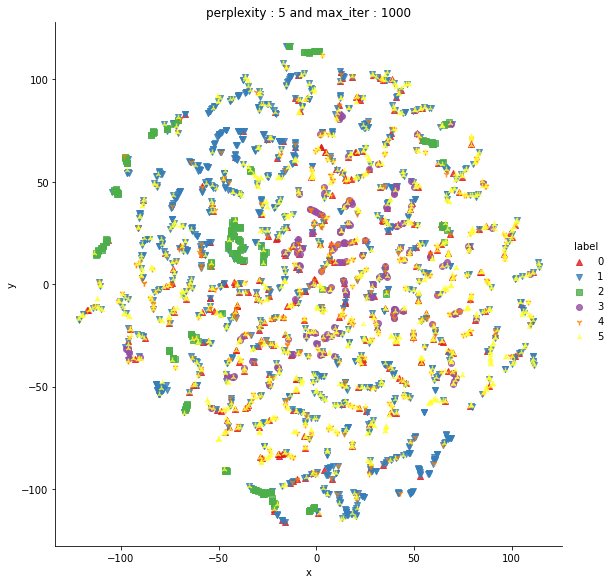

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3555 samples in 0.002s...
[t-SNE] Computed neighbors for 3555 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3555
[t-SNE] Computed conditional probabilities for sample 2000 / 3555
[t-SNE] Computed conditional probabilities for sample 3000 / 3555
[t-SNE] Computed conditional probabilities for sample 3555 / 3555
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.074s


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 50: error = 90.3474884, gradient norm = 0.0586892 (50 iterations in 1.368s)
[t-SNE] Iteration 100: error = 77.4565125, gradient norm = 0.0207656 (50 iterations in 1.050s)
[t-SNE] Iteration 150: error = 73.7173767, gradient norm = 0.0147332 (50 iterations in 1.022s)
[t-SNE] Iteration 200: error = 71.6203995, gradient norm = 0.0083419 (50 iterations in 0.999s)
[t-SNE] Iteration 250: error = 70.2135010, gradient norm = 0.0106030 (50 iterations in 1.006s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.213501
[t-SNE] Iteration 300: error = 1.7938572, gradient norm = 0.0013562 (50 iterations in 1.012s)
[t-SNE] Iteration 350: error = 1.2107122, gradient norm = 0.0005743 (50 iterations in 1.861s)
[t-SNE] Iteration 400: error = 0.9846371, gradient norm = 0.0003607 (50 iterations in 0.966s)
[t-SNE] Iteration 450: error = 0.8746474, gradient norm = 0.0002553 (50 iterations in 0.975s)
[t-SNE] Iteration 500: error = 0.8093469, gradient norm = 0.0002076 (50 

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


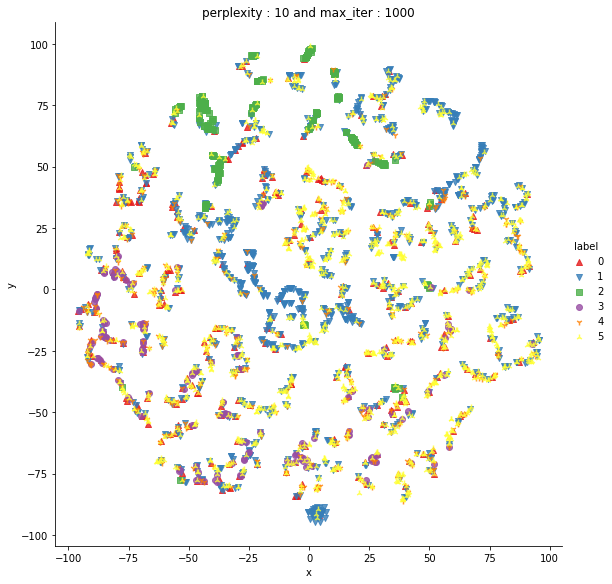

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 3555 samples in 0.002s...
[t-SNE] Computed neighbors for 3555 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3555
[t-SNE] Computed conditional probabilities for sample 2000 / 3555
[t-SNE] Computed conditional probabilities for sample 3000 / 3555
[t-SNE] Computed conditional probabilities for sample 3555 / 3555
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.136s


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 50: error = 83.0170059, gradient norm = 0.0502221 (50 iterations in 1.883s)
[t-SNE] Iteration 100: error = 72.0271606, gradient norm = 0.0116754 (50 iterations in 1.209s)
[t-SNE] Iteration 150: error = 69.8553085, gradient norm = 0.0088650 (50 iterations in 1.151s)
[t-SNE] Iteration 200: error = 68.7611771, gradient norm = 0.0078693 (50 iterations in 1.101s)
[t-SNE] Iteration 250: error = 68.1251984, gradient norm = 0.0057351 (50 iterations in 1.097s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.125198
[t-SNE] Iteration 300: error = 1.4661696, gradient norm = 0.0012721 (50 iterations in 1.075s)
[t-SNE] Iteration 350: error = 1.0320764, gradient norm = 0.0004760 (50 iterations in 1.084s)
[t-SNE] Iteration 400: error = 0.8738667, gradient norm = 0.0002711 (50 iterations in 1.187s)
[t-SNE] Iteration 450: error = 0.7961523, gradient norm = 0.0001958 (50 iterations in 1.071s)
[t-SNE] Iteration 500: error = 0.7548620, gradient norm = 0.0001543 (50 

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


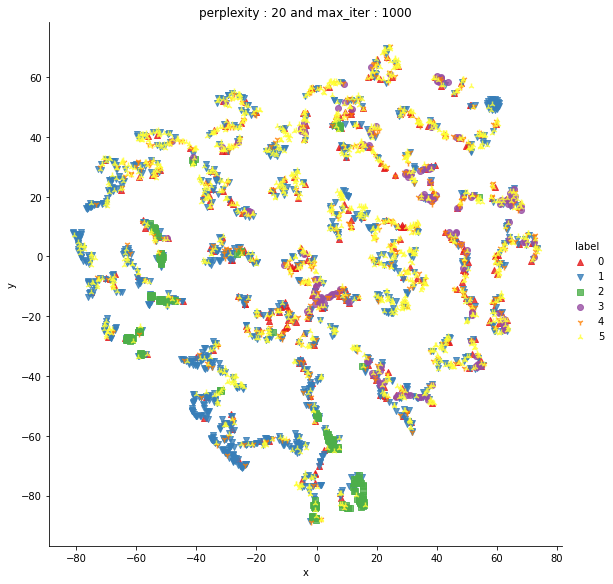

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3555 samples in 0.002s...
[t-SNE] Computed neighbors for 3555 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3555

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(



[t-SNE] Computed conditional probabilities for sample 2000 / 3555
[t-SNE] Computed conditional probabilities for sample 3000 / 3555
[t-SNE] Computed conditional probabilities for sample 3555 / 3555
[t-SNE] Mean sigma: 0.106614
[t-SNE] Computed conditional probabilities in 0.307s
[t-SNE] Iteration 50: error = 72.0398254, gradient norm = 0.0490963 (50 iterations in 1.806s)
[t-SNE] Iteration 100: error = 64.2857971, gradient norm = 0.0060173 (50 iterations in 1.410s)
[t-SNE] Iteration 150: error = 63.2119598, gradient norm = 0.0041191 (50 iterations in 1.433s)
[t-SNE] Iteration 200: error = 62.8795547, gradient norm = 0.0016981 (50 iterations in 1.392s)
[t-SNE] Iteration 250: error = 62.7876663, gradient norm = 0.0008172 (50 iterations in 1.393s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.787666
[t-SNE] Iteration 300: error = 0.9788384, gradient norm = 0.0009226 (50 iterations in 1.374s)
[t-SNE] Iteration 350: error = 0.7358637, gradient norm = 0.0003307 (50 i

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


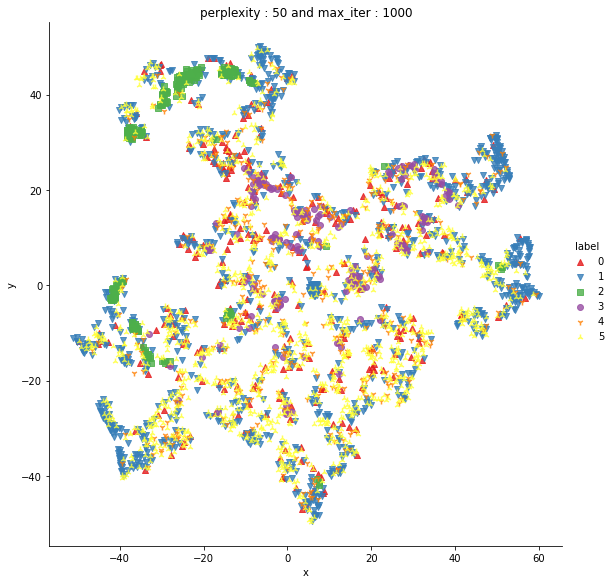

Done


In [157]:
X_pre_tsne = df.drop(['y', 'activity'], axis=1)
y_pre_tsne = df['activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

En la última gráfica resultante, se observa que se forman pequeños grupos de puntos de una misma actividad (no es tan evidente debido a que los puntos verdes se sobreponen a los otros). Lo curioso, es que los puntos de Jogging estan principalmente en los extremos de la nube de puntos, probablemente debido a sus valores sesgados. Por último, en el centro se concentran varias subnubes de puntos de la actividad Standing, reflejando la reducida cantidad de sesgos.

###Entrega 04 - MODEL

In [158]:
from sklearn.svm import SVC #utilizar SVM
from sklearn import metrics #para comprobar la precisión del modelo
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split #dividir en conjunto de entrenamiento y prueba.
from sklearn.ensemble import RandomForestClassifier #utilizar Random Forest
from sklearn import datasets #importar conjunto de datos
import xgboost as xgb #utilizar xgboost

####**SVM**

Primer modelo se implementa con el algoritmo de Máquinas de Vectores de Soporte [Support vector machine] (SVM). Es un algoritmo de aprendizaje supervisado que se utiliza en problemas de clasificación y regresión.


In [159]:
#Separando la matriz en dos partes

#La submatriz 'x_svm' contiene los valores de las primeras 4 columnas del conjunto de datos y todas las filas
x_svm=df.iloc[:,0:3]
x_svm

,x,y,z
0,1.292864,1.259857,-0.192860
1,0.056273,-0.077881,-0.174884
2,-0.213635,-0.284930,1.300390
3,-1.316739,-0.185076,-0.232696
4,0.393659,0.378800,-0.937144
...,...,...,...
3550,-0.018538,-0.055855,-0.536743
3551,1.245924,-0.270245,1.186907
3552,-0.046409,0.152662,0.285470
3553,-1.084970,-0.331919,0.210529


In [160]:
#El vector contiene los valores de la columna 4 'Species' con todas las filas
y_svm=df.iloc[:,3]
y_svm

0       1
1       5
2       1
3       3
4       5
       ..
3550    4
3551    1
3552    5
3553    4
3554    1
Name: activity, Length: 3555, dtype: int64

In [161]:
#dividir en conjunto de entrenamiento y prueba.
#70% datos de entrenamiento 30% datos de test
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size=0.30)

In [162]:
print("Tamaño de los datos de train: ", len(x_train_svm))
print("Tamaño de los datos de test: ", len(x_test_svm))

Tamaño de los datos de train:  2488
Tamaño de los datos de test:  1067


In [163]:
print(x_train_svm.shape)
print(y_train_svm.shape)
print(x_test_svm.shape)
print(y_test_svm.shape)

(2488, 3)
(2488,)
(1067, 3)
(1067,)


In [164]:
#Elegimos el kernel rbf, pues en base al último gráfico de dispersión presentado no es posible obtener buenos resultados aplicando uno lineal.
#Usamos gamma 10, pues es el valor de la anchura de las curvas gaussianas que dió mejores resultados. No se recomendaría usar un valor alto, pues el 
#modelo no esta sobreajustado .
#No aplicamos random_state, ya que queremos comprar los resultados de los modelos bajo los mismos datos. No con muestras distintas.
#Ponemos probability True para ejecutar el algoritmo de obtencion de area bajo la curva
model = SVC(kernel='rbf', gamma=10, probability=True)

modelFitted = model.fit(x_train_svm, y_train_svm)

In [165]:
pred_svm = model.predict(x_test_svm)

In [166]:
print(classification_report(y_test_svm, pred_svm))
print(confusion_matrix(y_test_svm, pred_svm))
acc_svm = metrics.accuracy_score(pred_svm, y_test_svm)
print('The accuracy of the SVM is:', acc_svm)
print("AOC: ", roc_auc_score(y_train_svm, modelFitted.predict_proba(x_train_svm), multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.64      0.75      0.69       338
           2       0.94      0.83      0.88        53
           3       0.48      0.71      0.57        49
           4       0.20      0.03      0.06       115
           5       0.55      0.71      0.62       411

    accuracy                           0.59      1067
   macro avg       0.47      0.51      0.47      1067
weighted avg       0.51      0.59      0.54      1067

[[  0  23   0   5   1  72]
 [  1 255   1   2   1  78]
 [  0   0  44   0   0   9]
 [  1   1   0  35   3   9]
 [  3  27   1  13   4  67]
 [  0  90   1  18  11 291]]
The accuracy of the SVM is: 0.5895032802249297
AOC:  0.9325272259733799



####**Random Forest**

Random Forest es un algoritmo de aprendizaje automático se puede utilizar tanto para tareas de clasificación como de regresión.


In [167]:
#Separando la matriz en dos partes

#La submatriz 'X_rf' contiene los valores de las primeras 4 columnas del conjunto de datos y todas las filas
X_rf = df.iloc[:, 0:3]
X_rf

,x,y,z
0,1.292864,1.259857,-0.192860
1,0.056273,-0.077881,-0.174884
2,-0.213635,-0.284930,1.300390
3,-1.316739,-0.185076,-0.232696
4,0.393659,0.378800,-0.937144
...,...,...,...
3550,-0.018538,-0.055855,-0.536743
3551,1.245924,-0.270245,1.186907
3552,-0.046409,0.152662,0.285470
3553,-1.084970,-0.331919,0.210529


In [168]:
#El vector contiene los valores de la columna 4 'Species' con todas las filas
y_rf = df.iloc[:, 3]
y_rf

0       1
1       5
2       1
3       3
4       5
       ..
3550    4
3551    1
3552    5
3553    4
3554    1
Name: activity, Length: 3555, dtype: int64

In [169]:
#dividir en conjunto de entrenamiento y prueba.
#70% datos de entrenamiento 30% datos de test

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf ,test_size = 0.3)

In [170]:
print("Size of training data: ", len(X_train_rf))
print("Size of test data: ", len(X_test_rf))

Size of training data:  2488
Size of test data:  1067


In [171]:
print(X_train_rf.shape)
print(y_train_rf.shape)
print(X_test_rf.shape)
print(y_test_rf.shape)

(2488, 3)
(2488,)
(1067, 3)
(1067,)


In [172]:
#Establecemos en 100 la cantidad de árboles a generar, y aplicamos "entropy" a la hora de dividir los datos.
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train_rf, y_train_rf)

RandomForestClassifier(criterion='entropy')

In [173]:
#Predicción de los resultados del conjunto de pruebas
y_pred_rf = classifier.predict(X_test_rf)

In [174]:
#Hacer la matriz de confusión
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
cm_rf

array([[  7,  18,   0,   3,   9,  60],
       [  6, 228,   5,   3,   8,  88],
       [  0,   2,  65,   1,   0,   1],
       [  0,   1,   0,  32,   4,  12],
       [  6,  25,   1,   9,   7,  69],
       [  7,  55,   0,   6,  21, 308]])

In [175]:
print(classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.27      0.07      0.11        97
           1       0.69      0.67      0.68       338
           2       0.92      0.94      0.93        69
           3       0.59      0.65      0.62        49
           4       0.14      0.06      0.08       117
           5       0.57      0.78      0.66       397

    accuracy                           0.61      1067
   macro avg       0.53      0.53      0.52      1067
weighted avg       0.56      0.61      0.57      1067



In [176]:
print('The accuracy of the Random forest is:',metrics.accuracy_score(y_pred_rf, y_test_rf))
print("AOC: ", roc_auc_score(y_train_rf, modelFitted.predict_proba(X_train_rf), multi_class='ovr'))

The accuracy of the Random forest is: 0.6063730084348641
AOC:  0.8918771653974407


####**XG Boost**

Este algoritmo trabaja con casos de clasificación, por lo cual aplica para este caso. Además, se reconoce como más poderoso que Random Forest (se compara con este, ya que también trabaja con árboles). Por otro lado, el algoritmo tiene un buen rendimiento con datasets grandes, por lo que se teorízan buenos resultados en la precisión.

In [177]:
X_boost = df.iloc[:, 0:3]
y_boost = df.iloc[:, 3]

In [178]:
#Volvemos a separar el dataset en features y target
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X_boost, y_boost, test_size=0.3)

In [179]:
print("Train data length:",len(X_train_boost));
print("Test data length:",len(X_test_boost));

Train data length: 2488
Test data length: 1067


In [180]:
#Creación del formato de datos Xgboost DMatrix (a partir de los arreglos ya obtenidos)

import xgboost as xgb

d_boosttrain = xgb.DMatrix(X_train_boost, label=y_train_boost)
d_boosttest = xgb.DMatrix(X_test_boost, label=y_test_boost)

In [181]:


#Configuración de algunos parámetros. Recomendación: revisar https://xgboost.readthedocs.io/en/stable/parameter.html 


#Ajustamos el num_class a 6, pues tenemos 6 clases diferentes en este dataset
parameters = {'eta': 0.3, 'silent': True, 'objective': 'multi:softprob', 'num_class': 6, 'max_depth': 6}  
num_round = 20



In [182]:
#Entrenar el modelo
bst = xgb.train(parameters, d_boosttrain, num_round)

In [183]:
#predicción
preds = bst.predict(d_boosttest)

In [184]:
preds[:5]

array([[0.00864138, 0.96785206, 0.00192206, 0.00166325, 0.01425009,
        0.00567119],
       [0.0197415 , 0.11133868, 0.00578583, 0.00539134, 0.09425615,
        0.7634865 ],
       [0.02479852, 0.4357792 , 0.00427807, 0.00409736, 0.047678  ,
        0.48336878],
       [0.04866169, 0.02238999, 0.00250563, 0.6880663 , 0.06614206,
        0.17223433],
       [0.11429014, 0.05400869, 0.0062975 , 0.21994877, 0.13329741,
        0.4721575 ]], dtype=float32)

In [185]:
#Seleccionar la columna que representa la mayor probabilidad 
#(tenga en cuenta que, para cada línea, hay 3 columnas, que indican la probabilidad de cada clase)

best_preds = np.asarray([np.argmax(line) for line in preds])

In [186]:
best_preds

array([1, 5, 5, ..., 5, 1, 3])

In [187]:
#Hacer la matriz de confusión
m = confusion_matrix(y_test_boost, best_preds)
m

array([[  1,  19,   0,   1,   5,  63],
       [  1, 204,   7,   0,   6, 125],
       [  0,   0,  56,   0,   0,   2],
       [  0,   0,   0,  42,   0,   8],
       [  0,  15,   0,   7,   4,  85],
       [  5,  65,   2,  12,   6, 326]])

In [188]:
#calculando la precisión 

print(precision_score(y_test_boost, best_preds, average='macro'))

0.5134770421877108


In [189]:
print(classification_report(y_test_boost, best_preds))
print("AOC: ", roc_auc_score(y_train_boost, modelFitted.predict_proba(X_train_boost), multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.14      0.01      0.02        89
           1       0.67      0.59      0.63       343
           2       0.86      0.97      0.91        58
           3       0.68      0.84      0.75        50
           4       0.19      0.04      0.06       111
           5       0.54      0.78      0.64       416

    accuracy                           0.59      1067
   macro avg       0.51      0.54      0.50      1067
weighted avg       0.54      0.59      0.54      1067

AOC:  0.8922307726040607


###Tabla de comparación de algoritmos anteriores:

| Algorithm| ACC | P | R | F1 | AUC |
| --- | --- | --- | --- | --- | --- |
| **SVM** | 0.6044985941893158 | 0.49  | 0.53 | 0.60 | 0.9389743292927942 |
| **Random Forest** | 0.5951265229615745 | 0.56  | 0.55 | 0.60 | 0.8965305272858259 |
| **XGBoost** | 0.5441175823259604 | 0.54  | 0.53 | 0.61 | 0.8992091552381579 |

###Entrega 5 - INTERPRET

###Interpretación de gráficos:

En base a lo observado en gráficas durante el experimento, evidenciamos que las actividades que no requieren un desplazamiento, como Sitting y Standing se asocian a parámetros más grandes comparados a las actividades restantes, que requieren un desplazamiento para efectuar la actividad. Esto nos proporciona una característica que permite reconocer a qué tipo de actividad (que involucra desplazamiento o no) podría pertencer un conjunto de parámetros.
Además, evidenciamos en el gráfico de caja y bigote de los datos que no involucran desplazamiento poseen el segmento inferior más grande (entre Q1 y la mediana). Esto nos dice que sus parámetros estan sesgados a la izquierda, es decir, que los datos se concentran más en valores altos, tal y como se mencionó antes. Esto también se justifica con el tamaño pequeños de sus cajas.

Por último, notamos en la gráfica de dispersión que las actividades que no requieren desplazamiento se logran agrupar con mayor efectividad que las demas actividades (color verde y purpura).

###Interpretación de resultados de modelos:

Gracias a la tabla anterior, evidenciamos que los 3 modelos estudiados no tienen un rendimiento muy bueno, pues el mejor (SVM) tan solo alcanza un 60% en su precisión. Sin embargo, la diferencia con Random Forest es minima, por lo que cualquiera de estos dos puede ser utilizado para este tipo de datos.

###Conclusión:

Ya habiendo interpretado las gráficas y rendimiento de los modelos estudiados, se puede afirmar que la hipotesis planteada: *Es posible reconocer la actividad humana a partir de sensores con métricas de rendimiento superior de 95%*, es medianamente cierta, ya que se fue posible detectar una relación entre las actividades que nos permitió clasificarlas (involucran desplazamiento y las que no), pero con un rendimiento mucho menor al esperado, lo cual abre la oportunidad de nuevos experimentos, sometiendo el conjunto de datos a otros algoritmos de clasificación.